In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [9]:
credit = pd.read_csv("creditcard.csv")

In [10]:
credit

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1315,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,1316,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1317,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1318,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [11]:
credit.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [12]:
credit.describe()

,Unnamed: 0,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [13]:
credit.drop(["Unnamed: 0"],inplace=True,axis = 1)   # dropping first colume

In [15]:
credit['card'] = credit['card'].map({'yes': 1, 'no': 0})   # changing to categorical data

In [16]:
credit['owner'] = credit['owner'].map({'yes': 1, 'no': 0})

In [17]:
credit['selfemp'] = credit['selfemp'].map({'yes': 1, 'no': 0})

In [18]:
credit

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


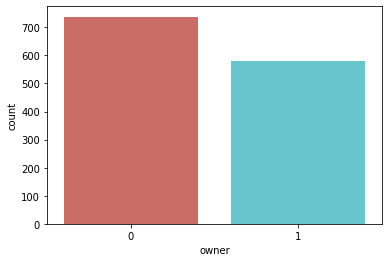

In [22]:
sb.countplot(x="owner",data=credit,palette="hls")

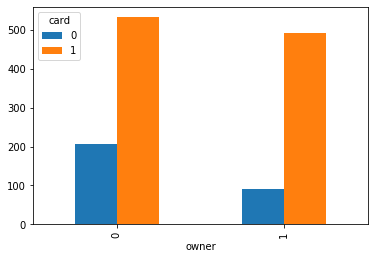

In [23]:
pd.crosstab(credit.owner,credit.card).plot(kind="bar")

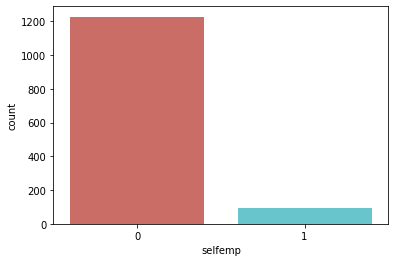

In [24]:
sb.countplot(x="selfemp",data=credit,palette="hls")

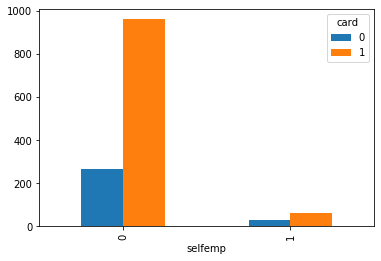

In [25]:
pd.crosstab(credit.selfemp,credit.card).plot(kind="bar")

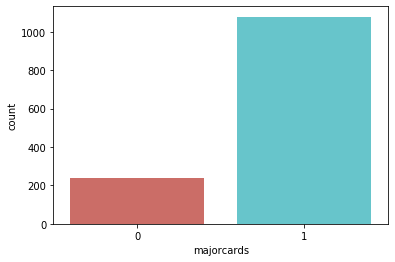

In [26]:
sb.countplot(x="majorcards",data=credit,palette="hls")

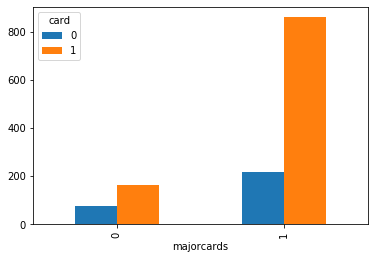

In [27]:
pd.crosstab(credit.majorcards,credit.card).plot(kind="bar")

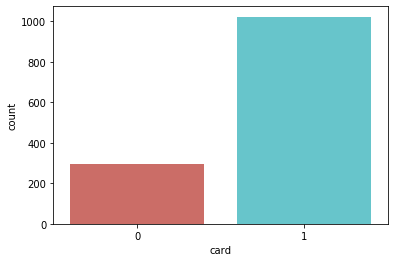

In [29]:
sb.countplot(x="card",data=credit,palette="hls")

In [30]:
# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns

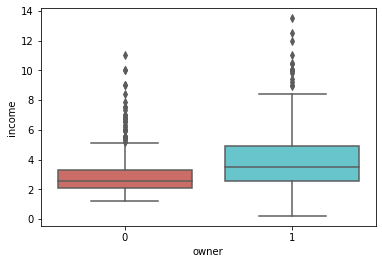

In [31]:
sb.boxplot(x="owner",y="income",data=credit,palette="hls")

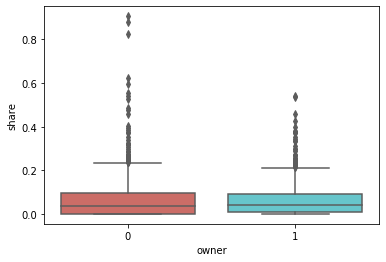

In [32]:
sb.boxplot(x="owner",y="share",data=credit,palette="hls")

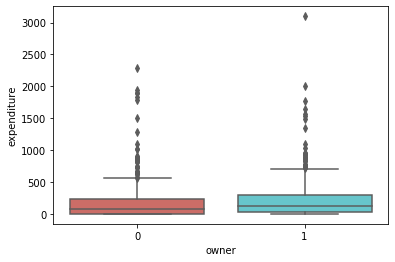

In [33]:
sb.boxplot(x="owner",y="expenditure",data=credit,palette="hls")

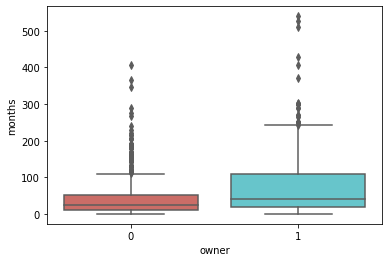

In [35]:
sb.boxplot(x="owner",y="months",data=credit,palette="hls")

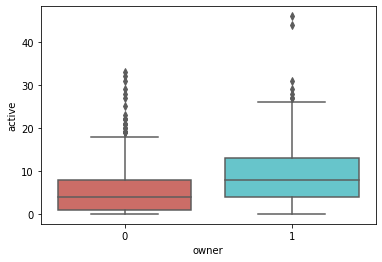

In [36]:
sb.boxplot(x="owner",y="active",data=credit,palette="hls")

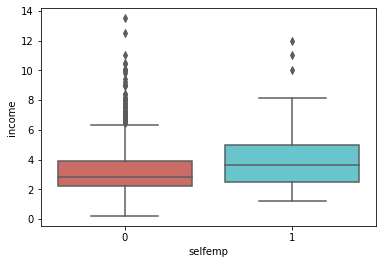

In [37]:
sb.boxplot(x="selfemp",y="income",data=credit,palette="hls")

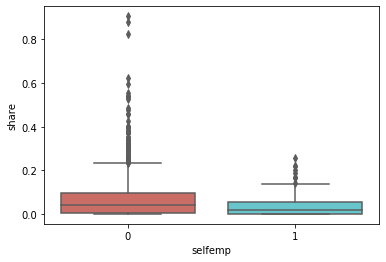

In [38]:
sb.boxplot(x="selfemp",y="share",data=credit,palette="hls")

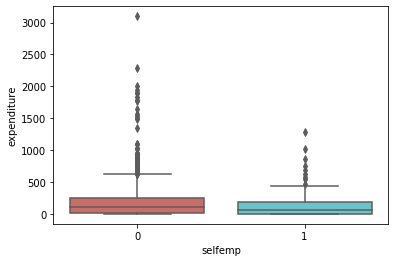

In [39]:
sb.boxplot(x="selfemp",y="expenditure",data=credit,palette="hls")

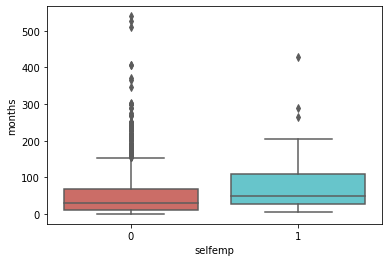

In [40]:
sb.boxplot(x="selfemp",y="months",data=credit,palette="hls")

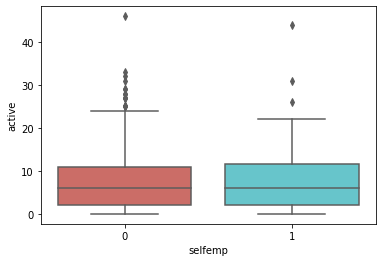

In [41]:
sb.boxplot(x="selfemp",y="active",data=credit,palette="hls")

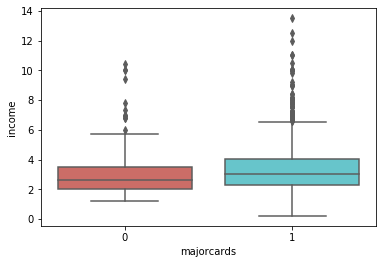

In [42]:
sb.boxplot(x="majorcards",y="income",data=credit,palette="hls")

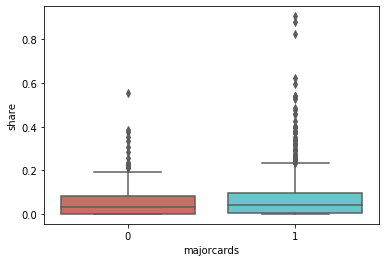

In [43]:
sb.boxplot(x="majorcards",y="share",data=credit,palette="hls")

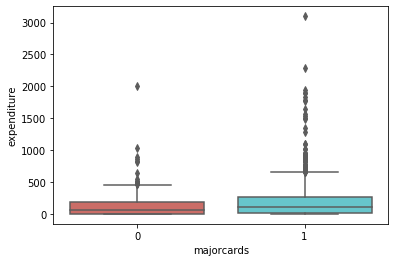

In [44]:
sb.boxplot(x="majorcards",y="expenditure",data=credit,palette="hls")

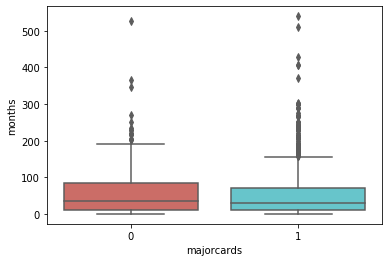

In [45]:
sb.boxplot(x="majorcards",y="months",data=credit,palette="hls")

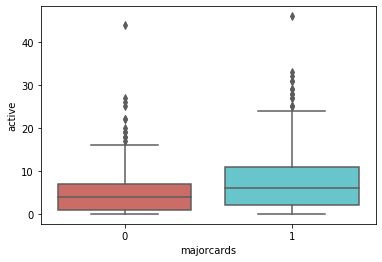

In [46]:
sb.boxplot(x="majorcards",y="active",data=credit,palette="hls")

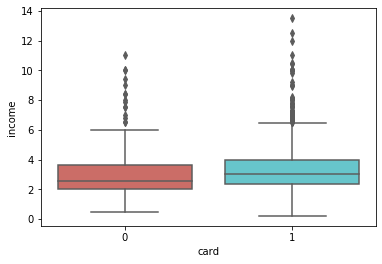

In [47]:
sb.boxplot(x="card",y="income",data=credit,palette="hls")

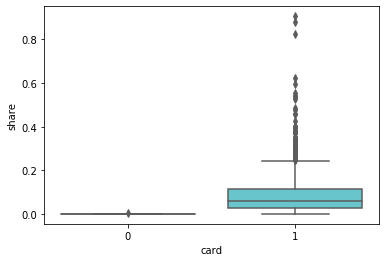

In [48]:
sb.boxplot(x="card",y="share",data=credit,palette="hls")

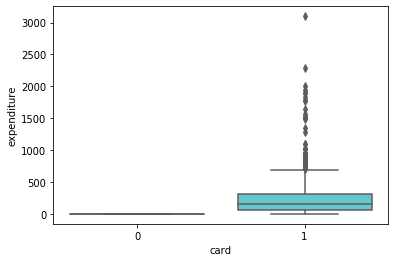

In [49]:
sb.boxplot(x="card",y="expenditure",data=credit,palette="hls")

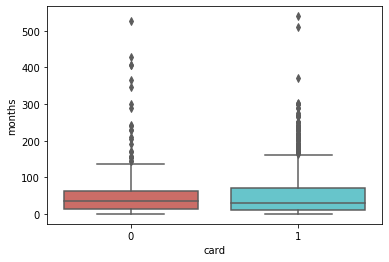

In [50]:
sb.boxplot(x="card",y="months",data=credit,palette="hls")

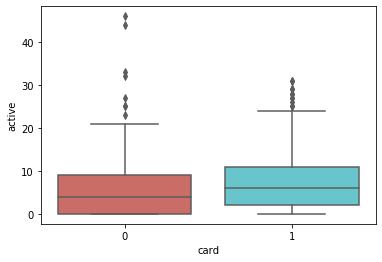

In [51]:
sb.boxplot(x="card",y="active",data=credit,palette="hls")

In [52]:
# To get the count of null values in the data 

credit.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [53]:
claimants.shape # 45211,1 => Before dropping null values

(45211, 1)

In [54]:
claimants.dropna().shape  # 45211,1 ->Because we dont have any null value

(45211, 1)

In [55]:
# Model building 

from sklearn.linear_model import LogisticRegression

In [57]:
credit.shape
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9]]
Y = credit.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values 

array([[0.00000000e+00, 1.00000000e+00],
       [1.40456375e-05, 9.99985954e-01],
       [7.85749410e-09, 9.99999992e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [59]:
y_pred = classifier.predict(X)

In [60]:
credit["y_pred"] = y_pred

In [61]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [62]:
new_df = pd.concat([credit,y_prob],axis=1)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[ 296    0]
 [  23 1000]]


In [65]:
type(y_pred)

numpy.ndarray

In [66]:
accuracy = sum(Y==y_pred)/claimants.shape[0]

In [67]:
pd.crosstab(y_pred,Y)

card,0,1
row_0,,
0,296,23
1,0,1000
